In [ ]:
#resources 
#https://towardsdatascience.com/building-an-image-color-analyzer-using-python-12de6b0acf74

In [1]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import cv2
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service

from time import sleep
import json

/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

def prep_image(raw_img):
    modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
    return modified_img

def color_analysis(img, url):
    
    clf = KMeans(n_clusters = 5)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_    
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i].round(3).tolist() for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]    
    plt.figure(figsize = (12, 8))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.title('color proportions from {u}'.format(u=url))
    plt.savefig('./plots/pie-' + url.replace('.', '-') + '.png')
    
    
    
    color_array = np.array(list(counts.values()))
    color_proportion = (color_array/sum(color_array)).round(3).tolist()
    #.tolist()
    
    color_dict = {}
    
    color_dict['centroids_rgb'] = ordered_colors
    color_dict['centroids_hex'] = hex_colors
    color_dict['color_counts'] = color_array.tolist()
    color_dict['color_proportion'] = color_proportion
    
    #print(hex_colors)
    return color_dict 

In [3]:
#urls = ['www.uber.com', 'www.lyft.com', 'www.doordash.com']
urls = ['www.uber.com']



====== WebDriver manager ======
Current google-chrome version is 101.0.4951
Get LATEST chromedriver version for 101.0.4951 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/101.0.4951.41/chromedriver_mac64.zip
Driver has been saved in cache [/Users/amywinecoff/.wdm/drivers/chromedriver/mac64/101.0.4951.41]


end...


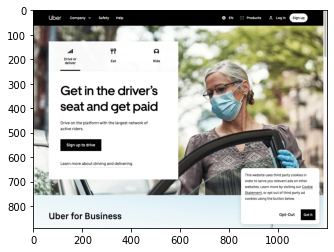

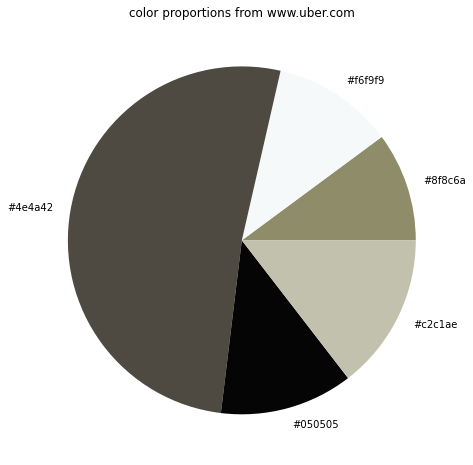

In [4]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
url_errors = {}
urls_color_dicts = []

for url in urls:
    
    try:
        
    
        driver.get('https://' + url)
        sleep(1)

        driver.get_screenshot_as_file('./site-screenshots/'+ url.replace('.', '-') + '.png')

        image = cv2.imread('./site-screenshots/'+ url.replace('.', '-') + '.png')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)

        modified_image = prep_image(image)
        color_dict = color_analysis(modified_image, url)
        color_dict['url'] = url
        color_dict['screenshot'] = url.replace('.', '-') + '.png'
        
        with open('site_screenshot_colors.json', 'a') as f:
            f.write(json.dumps(color_dict))
            f.write('\n')
                                      

        urls_color_dicts.append(color_dict)
        
        
        
                
    
    except Exception as e:
        
        print("url {url} error {e}".format(url=url, e=e))
        
        url_errors[url] = e

#driver.quit()

print("end...")

In [ ]:
element.value_of_css_property(property_name)
driver.get("https://google.com")
cssValue = driver.find_element_by_name("q").value_of_css_property("font-size")

In [14]:
from selenium.webdriver.common.by import By

In [20]:
#element = driver.find_element_by_tag_name('title')
element = driver.find_element(By.TAG_NAME, value='title')
properties = driver.execute_script('return window.getComputedStyle(arguments[0], null);', element)
for property in properties:
    print(property, element.value_of_css_property(property))

accent-color auto
align-content normal
align-items normal
align-self auto
alignment-baseline auto
animation-delay 0s
animation-direction normal
animation-duration 0s
animation-fill-mode none
animation-iteration-count 1
animation-name none
animation-play-state running
animation-timing-function ease
app-region none
appearance none
backdrop-filter none
backface-visibility visible
background-attachment scroll
background-blend-mode normal
background-clip border-box
background-color rgba(0, 0, 0, 0)
background-image none
background-origin padding-box
background-position 0% 0%
background-repeat repeat
background-size auto
baseline-shift 0px
block-size auto
border-block-end-color rgb(0, 0, 0)
border-block-end-style none
border-block-end-width 0px
border-block-start-color rgb(0, 0, 0)
border-block-start-style none
border-block-start-width 0px
border-bottom-color rgba(0, 0, 0, 1)
border-bottom-left-radius 0px
border-bottom-right-radius 0px
border-bottom-style none
border-bottom-width 0px
border-

In [25]:
print(element.value_of_css_property("background-color"))
print(element.value_of_css_property("color"))
print(element.value_of_css_property("font-family"))

rgba(0, 0, 0, 0)
rgba(0, 0, 0, 1)
sans-serif


In [18]:
t

<bound method WebElement.value_of_css_property of <selenium.webdriver.remote.webelement.WebElement (session="67d0645dea626530be8a89a054a15b85", element="ede6a217-6fdd-42e1-b785-223173389469")>>